# Linear stability analysis

We want to analyse the following nonlinear ODE system [Lengyel et al., J. Am. Chem. Soc. 1990]

\begin{equation}
\dot{x} &= a - x - \frac{4xy}{1+x^2} \\
\dot{y} &= b \, x \left( 1-\frac{y}{1+x^2} \right)
\end{align}

In [3]:
import sympy

In [4]:
from sympy import init_printing, symbols, Matrix, solve, lambdify
init_printing()  # beautiful maths

In [5]:
a, b, x, y, theta = symbols("a b x y theta")

In [6]:
a1 = symbols("a_1")
a1

In [7]:
a

In [8]:
theta

We define functions for the right-hand side

In [9]:
def f1(x, y):
    return a - x - 4*x*y / (1+x**2)

def f2(x, y):
    return b * x * (1 - y/(1+x**2))

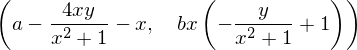

In [10]:
f1(x, y), f2(x,y)

In `sympy`, vectors are expressed using the `Matrix` type:

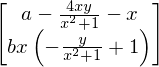

In [11]:
M = Matrix([f1(x,y), f2(x,y)])
M

We can treat `M` as a function and find its Jacobian with respect to the variables $x$ and $y$:

`sympy` has capabilities for solving nonlinear equations:

In [12]:
fixed_point = solve(M, [x,y])[2]
fixed_point

IndexError: list index out of range

We may substitute values using a dictionary syntax:

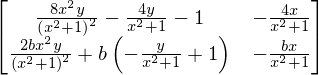

In [13]:
M.jacobian([x, y])

In [14]:
J = M.jacobian([x,y]).subs({x:fixed_point[0], y:fixed_point[1]})
J

NameError: name 'fixed_point' is not defined

In [15]:
J.charpoly()

NameError: name 'J' is not defined

In [16]:
J.eigenvals()

NameError: name 'J' is not defined

There is a special function `lambdify` in `sympy` that enables us to extract information from `sympy` into a numerical context (`numpy`). `lambdify` produces a `lambda` anonymous function mapping its inputs to outputs. 

In [17]:
JJ = lambdify([a], J)
JJ

NameError: name 'J' is not defined

In [ ]:
lambdify([x,y])

In [ ]:
import numpy as np

In [ ]:
np.array( JJ(3, 2) )

----
**Exercise**: Use the results from this notebook to add a subplot to the phase portrait showing how the eigenvalues of the linearised Jacobian at the fixed point change.

----